### Problem Statement
Build training and testing dataset of assignment 2 to predict the probability of a survival of a person based on gender, age and passenger-class. Use Naive Bayes classification algorithm to predict the class of passanger.

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
data = pd.read_csv('kaggle_titanic_dataset.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Pre-Processing**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
# dropping unnecessary columns
data.drop(labels=['Ticket','Embarked','Cabin','Name'], axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [8]:
data['Sex'] = data['Sex'].apply(lambda x: x=='male')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,True,22.0,1,0,7.2500
2,1,1,False,38.0,1,0,71.2833
3,1,3,False,26.0,0,0,7.9250
4,1,1,False,35.0,1,0,53.1000
5,0,3,True,35.0,0,0,8.0500


In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
# filling missing age values
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    bool   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: bool(1), float64(2), int64(4)
memory usage: 49.6 KB


<AxesSubplot:>

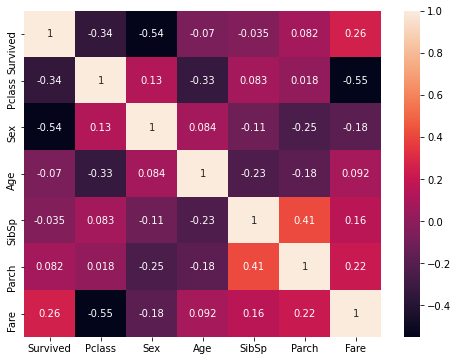

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

0    549
1    342
Name: Survived, dtype: int64


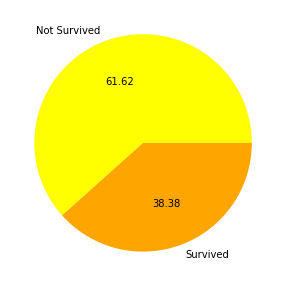

In [12]:
plt.figure(figsize=(5,5))
plt.pie(data['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct='%.2f',colors=['yellow','orange'])
print(data['Survived'].value_counts())

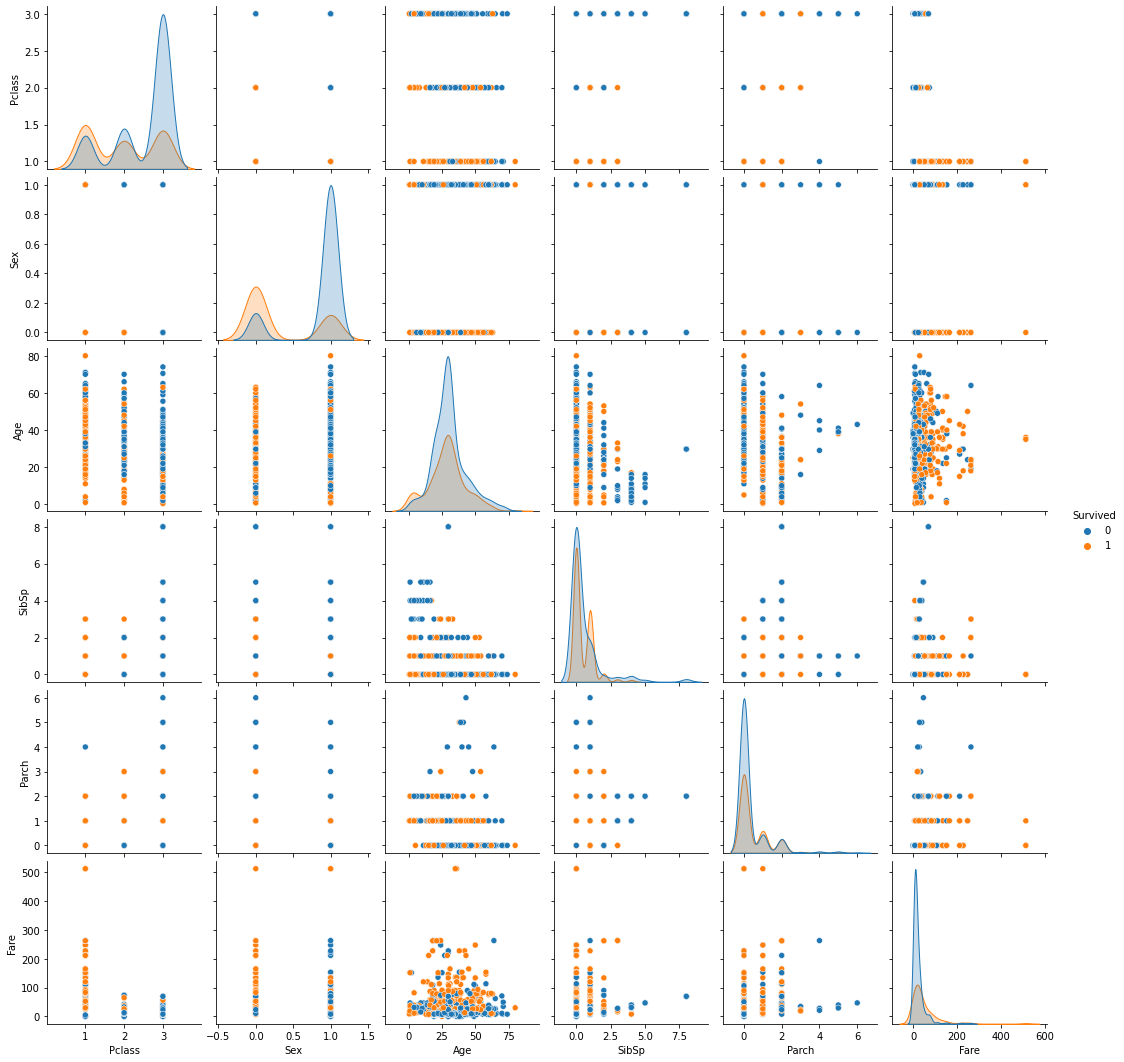

In [13]:
sns.pairplot(data,hue='Survived')

**Construct and Fit Classification Model**

In [14]:
x = data[['Sex','Age','Pclass']]
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [15]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

**Evaluate Model**

In [16]:
model.score(x_train,y_train)

0.785234899328859

In [17]:
model.score(x_test,y_test)

0.7932203389830509

In [18]:
test_set_prediction = model.predict(x_test)
test_set_prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=confusion_matrix,index=['No','Yes'],columns=['Predicted No','Predicted Yes'])
matrix_df

,Predicted No,Predicted Yes
No,144,30
Yes,31,90


<AxesSubplot:>

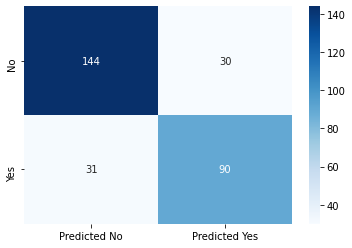

In [20]:
sns.heatmap(data=matrix_df,cmap='Blues',annot=True,fmt='d')

In [21]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       174
           1       0.75      0.74      0.75       121

    accuracy                           0.79       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.79      0.79      0.79       295

